# Домашнее задание 2

Это домашнее задание по материалам второго семинаров. Дедлайн по отправке - 23:55 17 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_2

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим проекцию на единичном $\ell_1$-шар:
\begin{equation*}
    \text{proj}_{C}(x) = \arg\min_{y \in C} \|x-y\|^2,
\end{equation*}
где $C = \{x ~|~ \|x\|_1 \leq 1 \}$.

__(а)__ Найдите выражение для такой проекции в явном виде.

При решении этой задачи, я пользовался [этой статьёй](https://angms.science/doc/CVX/Proj_l1.pdf)

Преобразуем:

$$\arg\min_{y \in C} \|x-y\|_2^2 = \arg\min_{\|y\|_1 \leq 1} \| x - y \|_2^2 = \arg\min_{\|y\|_1 \leq 1} \frac{1}{2} \|x-y\|_2^2$$

Воспользуемся теоремой Каруша-Куна-Таккера. Запишем Лагранжиан:

$$\mathcal{L}(x, \lambda) = \frac{1}{2} \|x - y \|_2^2 + \lambda~(\|y\|_1 - 1) = \sum\limits_{i = 1}^d \left( \frac{1}{2} (y_i - x_i)^2 + \lambda |y_i| \right) - \lambda$$

$$\mathcal{L_i}(x, \lambda) = \frac{1}{2} (y_i - x_i)^2 + \lambda |y_i|$$

1. Условие стационарности: $0 \in \partial_{y_i} L_i $

$$0 \in y_i - x_i + \lambda
    \begin{cases}
        -1, & \text{если $y_i < 0$;} \\
        [-1; 1], & \text{если $y_i = 0$;}\\
        1, & \text{если $y_i > 0$.}
    \end{cases}
$$

$$y_i = sign(x_i)(|x_i| - \lambda)_+, $$

где $(\cdot)_+ = max(\cdot, 0)$

2. Дополняющая нежесткость: $\lambda (\| y \|_1 - 1) = 0$

3. Ограничения: $\| y \|_1 - 1 \leq 0$

4. Неотрицательность: $\lambda \geq 0$

Рассмотрим два случая:

1) $\lambda = 0$:

$$
    \begin{cases}
        y_i = x_i \Rightarrow y = x; \\
        \| x \|_1 \leq 1.\\
    \end{cases}
$$

2) $\lambda > 0$:

$$
    \begin{cases}
        y_i = sign(x_i)(|x_i| - \lambda)_+; \\
        \| y \|_1 = 1.\\
    \end{cases}
$$

$$
    \begin{cases}
        y_i = sign(x_i)(|x_i| - \lambda)_+; \\
        \sum\limits_{i = 1}^d (|x_i| - \lambda)_+ = 1.\\
    \end{cases}
$$

Для нахождения $\lambda$ из уравнения $\sum\limits_{i = 1}^d (|x_i| - \lambda)_+ = 1$ я воспользовался [статьёй](https://pdfs.semanticscholar.org/3c63/e937c14f477e3880b143e9505b2efe4f5ccf.pdf).

$$g(\lambda) = \sum\limits_{i = 1}^d (|x_i| - \lambda)_+ - 1$$

a) Если $g(0) \leq 0 \Rightarrow \| x \|_1 \leq 1$ , то можно взять $y = x$.

б) Добавим 0 к вектору $|x|$ и отсортируем компоненты вектора $|x|$ по возрастанию, получим вектор $|x|'$.

в) Функция $g(\lambda)$ невозрастающая на $[0, +\infty)$,  начиная с какого-то $\lambda'$ $g(\lambda') < 0$.

г) Если $g(0) > 0$, то найдётся $m$ такое, что $g(x_{m}') \geq 0$ и $g(x_{m + 1}') < 0$, следовательно:

$$\sum\limits_{i = m + 1}^d (|x_i|' - \lambda) = 1 \Rightarrow \lambda = \frac{1}{d - m} \left( \sum\limits_{i = m + 1}^d |x_i|' - 1 \right)$$

Таким образом:

$$
    \begin{cases}
        \text{proj}_{C}(x) = x, & \text{если $\| x \|_1 \leq 1$;} \\
        \text{proj}_{C}(x)_i = sign(x_i)(|x_i| - \lambda)_+ \quad \forall i \in \overline{1, d}, & \text{если $\| x \|_1 > 1$,}
    \end{cases}
$$

где $\lambda$ находится из уравнения $\sum\limits_{i = 1}^d (|x_i| - \lambda)_+ = 1$.

__(б)__ Сравните:
\begin{equation*}
    \text{proj}_C (x) \quad \text{и} \quad \text{prox}_{\lambda \mathbb{I}_C} (x),
\end{equation*}
где $\lambda > 0$, а $\mathbb{I}_C$ - индикаторная функция множества $C$:
$$
\mathbb{I}_C = 
\begin{cases}
0 ,& x \in C \\
+\infty, &x \notin C.
\end{cases}
$$
Являются ли данные операторы эквивалентными для любых $\lambda > 0$ и выпуклых $C$?

По определению:

$$\text{proj}_C (x) = \arg\min_{y \in C} \{ \|y - x \|_2^2 \}$$

$$\text{prox}_{\lambda \mathbb{I}_C} (x) = \arg\min_{y \in \mathbb{R}^d} \left\{ \frac{1}{2} \|y - x \|_2^2 + \mathbb{I}_C (x)\right\}$$

$\bullet$ Если $y \in \mathbb{R} \setminus C$, то $\text{prox}_{\lambda \mathbb{I}_C} (x) = +\infty$.
    
$\bullet$ Если $y \in C$, то $\text{prox}_{\lambda \mathbb{I}_C} (x) \in \mathbb{R}^d$. 

То есть:

$$\text{prox}_{\lambda \mathbb{I}_C} (x) = \arg\min_{y \in C} \left\{ \frac{1}{2} \|y - x \|_2^2 \right\} = \arg\min_{y \in C} \{ \|y - x \|_2^2 \}$$

Таким образом, $\text{proj}_C (x) = \text{prox}_{\lambda \mathbb{I}_C} (x)$.

In [2]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from matplotlib import pylab as plt
from sklearn.metrics import accuracy_score, mean_squared_error

## Задача 2

Рассмотрим задачу минимизации эмпирического риска:
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i),
\end{equation}
где $l$ - функция потерь, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ - выборка данных из векторов признаков $x_i$ и меток $y_i$.

Далее будем рассматривать линейную модель $g(w, x) = w^T x$ и квадратичную функцию потерь $l(z, y) = (z-y)^2$.

__(а)__ Запишите задачу минимизации эмпирического риска с линейной моделью  и квадратичной функцией потерь в векторно-матричном виде, используя $X$ - матрицу из векторов $\{x_i\}$ и вектор $y$ - из $\{y_i\}$.

Пусть $x_i \in \mathbb{R}^d$ - ветор признаков для $i$-го элемента выборки. Тогда:

$$X = \begin{pmatrix}
        x_1^T \\
        \vdots \\
        x_n^T
      \end{pmatrix}$$
      
$$\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (g(w, x_i), y_i) = \min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n l (w^Tx_i, y_i) = \min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n (w^Tx_i - y_i)^2 = \min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n (x_i^Tw - y_i)^2 = \min_{w \in \mathbb{R}^d} \frac{1}{n} \|Xw - y\|_2^2$$

__(б)__ К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируйте матрицу $X$ и вектор $y$:

In [3]:
dataset = "mushrooms.txt" 
#файл должен лежать в той же деректории, что и notebook

In [4]:
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape

In [5]:
seed = 3

np.random.seed(seed)
np.random.shuffle(X)
X_train = X[:(n*4) // 5]
X_test = X[(n*4) // 5:]

np.random.seed(seed)
np.random.shuffle(y)
y_train = y[:(n*4) // 5]
y_test = y[(n*4) // 5:]

Для разделения данных на обучающую и тестовую я случайным образом перемешал данные, а потом 4/5 данных взял, как обучающую, а 1/5 как тестовую.

__(в)__ Для обучающей части $X_{train}$, $y_{train}$ оцените константу $L$ задачи обучения/оптимизации. Будет ли задача выпуклой? Сильно выпуклой?

$$f(w) = \frac{1}{n} \|Xw - y\|_2^2 = \frac{1}{n} \left< Xw - y, Xw - y \right> = \frac{1}{n} \left< Xw, Xw \right> - \frac{2}{n} \left< Xw, y \right> + \frac{1}{n} \left< y, y \right>$$

$$f(w) = \frac{1}{2} \left<w, Aw \right> - \left<b, w \right> + c, $$

где $$A = \frac{2}{n} X^TX, \quad b = \frac{2}{n} X^Ty, \quad c = \frac{1}{n} \|y\|_2^2$$

Воспользуемся результатми, полученными в первом дз, а именно:

$$\mu = \frac{1}{2} \lambda_{min} (A + A^T) = \frac{2}{n} \lambda_{min} X^TX$$

$$L = \frac{1}{2} \lambda_{max}\left(A + A^T \right) = \frac{2}{n} \lambda_{max} X^TX$$

In [6]:
pr, _ = np.linalg.eigh(2 / X_train.shape[0] * X_train.T @ X_train)
mu = np.min(pr)
L = np.max(pr)
print("mu =", round(mu, 16))
print("L =", round(L, 2))

mu = -5e-16
L = 20.7


Величина константы $\mu$ получилась сравнимой с машинной ошибкой, поэтому её можно считать равной нулю (она не может быть отрицательной из вида матрицы). Следовательно задача выпуклая, но не сильно выпуклая.

__(г)__ Используя материалы прошлого ДЗ (по желанию), решите задачу оптимизации/обучите модель машинного обучения с помощью градиентного спуска. Изобразите график сходимости. Какой критерий сходимости будет использовать? Сделайте вывод. Опишите проблемы, с которыми пришлось столкнуться.

In [7]:
#Целевая функция
def f(w):
    return 1 / F.shape[0] * np.linalg.norm(F @ w - a, ord = 2)**2

#Градиент функции 
def grad_f(w):
    return 2 / F.shape[0] * (F.T @ (F @ w - a))

crit - критерий сходимости:

0. crit = 0: $\left\| x^k - x^* \right\|_2^2$
1. crit = 1: $\left| f(x^k) - f(x^*)\right|$
2. crit = 2: $\left\| x^{k+1} - x^k \right\|_2^2$
3. crit = 3: $\left | f(x^{k+1}) - f(x^k) \right|$
4. crit = 4: $\left\| \nabla f(x^k) \right\|_2^2$

In [8]:
#Градиентный спуск из 1-го задания
def gradient_descent(grad_f, x_0, gamma, iteration, f, crit, x_sol=None, epsilon=10**-7):
    x_now = x_0
    errors = []
    for k in range(iteration):
        x_next = x_now - gamma * grad_f(x_now)
        if crit == 0:
            err = np.linalg.norm(x_now - x_sol, ord = 2)**2
        elif crit == 1:
            err = f(x_now) - f(x_sol)
        elif crit == 2:
            err = np.linalg.norm(x_next - x_now, ord = 2)**2
        elif crit == 3:
            err = f(x_now) - f(x_next)
        elif crit == 4:
            err = np.linalg.norm(grad_f(x_now), ord = 2)**2
        x_now = x_next
        errors.append(err)
        if err < epsilon:
            break
    return x_now, errors

In [10]:
F = X_train
a = y_train

np.random.seed(7)
w_0 = np.random.sample(d)

Определим каким критерием сходимости будем пользоваться. $x^*$ мы не можем посчитать, так как $\mu = 0$ (матрица $\frac{2}{n}X^T_{train}X_{train}$ вырождена, а значит нет обратной). Тогда остается три возможных критерия, выберем по совокупности точности и времени работы.

1. $\left\| x^{k+1} - x^k \right\|_2^2 < \varepsilon$

In [559]:
%%time
w, _ = gradient_descent(grad_f, w_0, 1 / L, 10**6, f, 2)
print("f(w) = ", f(w))

f(w) =  0.004234812210566295
CPU times: user 2.04 s, sys: 27.7 ms, total: 2.06 s
Wall time: 521 ms


2. $\left| f(x^{k+1}) - f(x^k) \right| < \varepsilon$

In [560]:
%%time
w, _ = gradient_descent(grad_f, w_0, 1 / L, 10**4, f, 3)
print("f(w) = ", f(w))

f(w) =  0.0015441893297182966
CPU times: user 14.1 s, sys: 235 ms, total: 14.4 s
Wall time: 3.73 s


3. $\left\| \nabla f(x^k) \right\|_2^2 < \varepsilon$

In [561]:
%%time
w, _ = gradient_descent(grad_f, w_0, 1 / L, 10**4, f, 4)
print("f(w) = ", f(w))

f(w) =  0.0013722565168650812
CPU times: user 16.2 s, sys: 158 ms, total: 16.4 s
Wall time: 4.13 s


Точность у третьего критерия наилучшая (можно добиться еще большей, но тогда время работы будет уже достаточно большим), а время работы второго и третьего критериев не сильно отличается, поэтому я буду пользоваться третьим критерием.

In [12]:
w, errors = gradient_descent(grad_f, w_0, 1 / L, 10**5, f, 4)
print("f(w) = ", f(w))

f(w) =  0.0012914615391833135


Построим график сходимости по критерию $\left\| \nabla f(x^k) \right\|_2^2 < \varepsilon$:

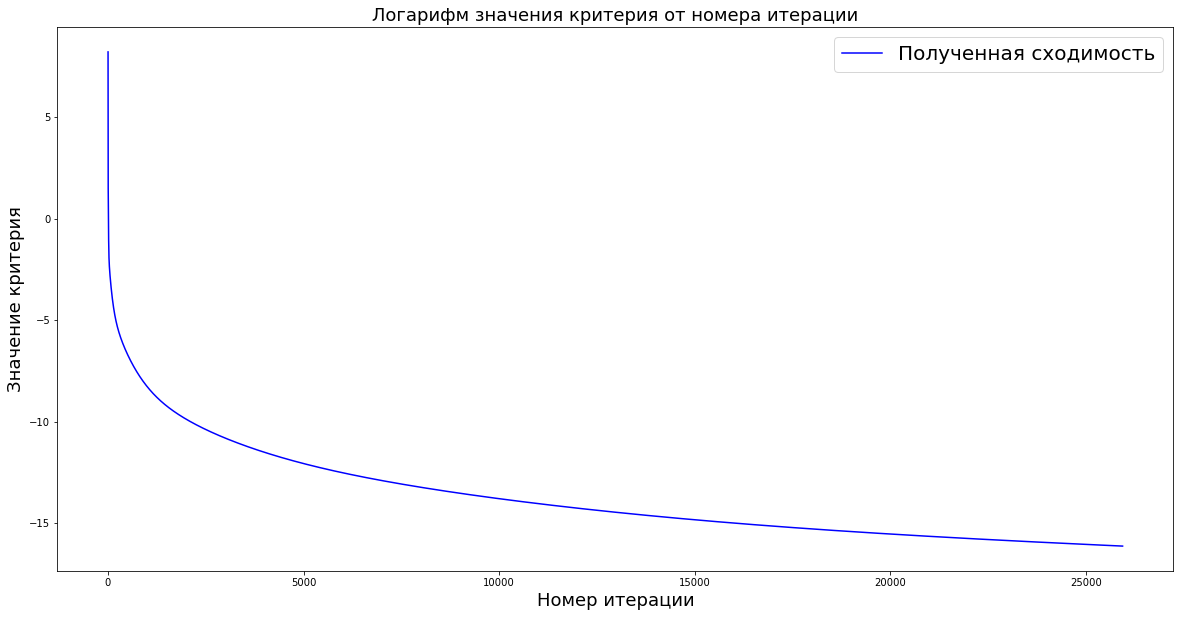

In [563]:
plt.figure(figsize = (20, 10))

iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'blue', label = 'Полученная сходимость')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Получили сублинейную сходимость. Проблем не было, за исключением того, что нельзя нати точное значение $x^*$.

__д)__ Как использовать итоговую модель для предсказания? Ответив на вопрос, сделайте предсказания на тестовой выборке. Сравните с реальными метками. Количество правильно угаданных меток есть точность/accuracy вашей модели. Запустите еще раз процесс обучения из пункта г), постройте как меняется точность модели от номера итерации градиентного спуска (измеряйте не каждую итерацию, а, например, каждую 100 или 1000). 

Предсказание:
    
$$y_{pred} = X_{test}w_{train}$$

Ответ может содержать только 1 и 2, поэтому надо округлить значения.

In [15]:
y_pred = X_test @ w
y_pred_ans = np.round(y_pred)

print("Accuracy =", accuracy_score(y_test, y_pred_ans))

[1.98454539 2.00661273 2.01152596 ... 0.93627999 1.99221114 2.00773839]
Accuracy = 0.9996922603477458


In [607]:
def accuracy_graf(y_test, X_test, grad_f, x_0, gamma, iteration, f, crit):
    accuracy = []
    for i in range(0, iteration + 1, 10):
        w, _ = gradient_descent(grad_f, x_0, gamma, i, f, crit)
        y_pred_ans = np.round(X_test @ w)
        accuracy.append(accuracy_score(y_test, y_pred_ans))
    return accuracy

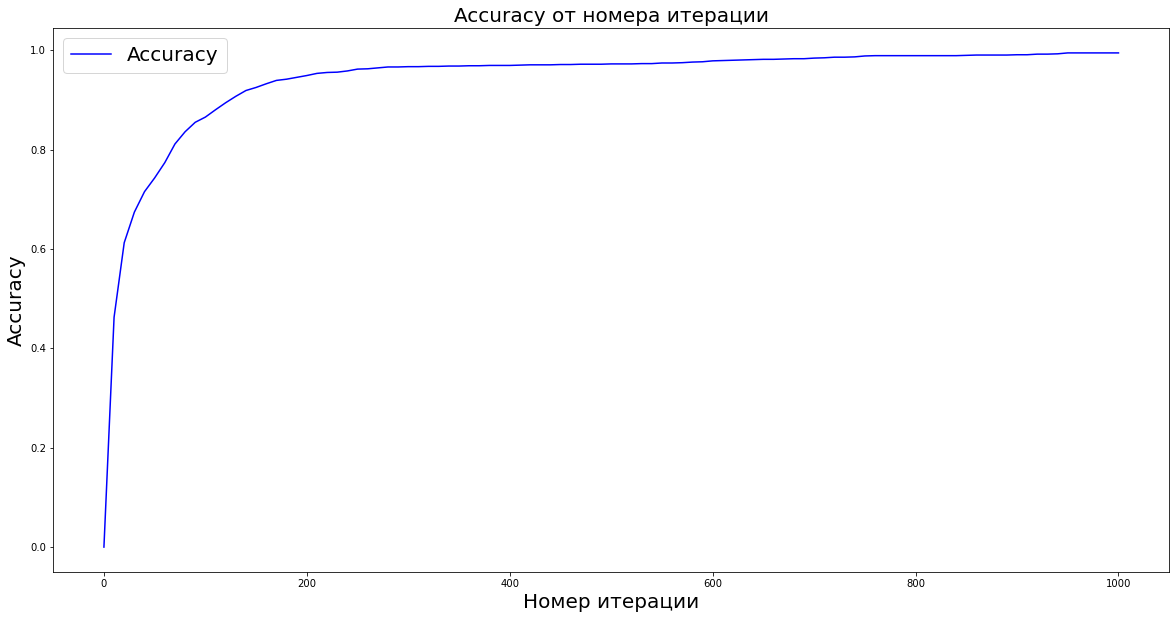

In [621]:
accuracy = accuracy_graf(y_test, X_test, grad_f, w_0, 1 / L, 1000, f, 4)

plt.figure(figsize = (20, 10))

iterations = 10 * np.array(range(len(accuracy)))
plt.plot(iterations, accuracy, color = 'blue', label = 'Accuracy')

plt.title("Accuracy от номера итерации", fontsize = 20)
plt.xlabel("Номер итерации", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)

plt.legend(fontsize = 20)
plt.show()

__е)__ Теперь рассмотрим эту же задачу обучения на $\ell_1$-шаре с радиусом $r$ (я поменял $\lambda$ на $r$ для удобства). Повторите пункты г) и д) только теперь градиентный спуск должен быть модифицирован с помощью оператора проекции. Пробуйте различные $r > 0$ и найдите лучшее (опишите почему именно такое лучшее). Удалось ли улучшить процесс обучения/точность модели на тестовой выборке? 

Воспользуемся результатами 1 задачи пункта a) с небольшим уточнением, заменим 1 на $r$ (так как в пунке a) 1 задачи был единичный шар, а тут шар радиуса $r$).

In [629]:
def proj(x):
    
    d = len(x)
    y = [0] * d
    
    def g(i):
        g = -r
        for j in range(d):
            g += max(x_sort[j] - x_sort[i], 0)
        return g
            
    if np.linalg.norm(x, ord = 1) <= r:
        return x;
    else:
        x_sort = np.sort(np.abs(x))
        x_new = [0] + x_sort
        for i in range(d):
            if g(i) >= 0 and g(i + 1) < 0:
                m = i
                break;
                
        lambd = 1 / (d - m) * (np.linalg.norm(x_sort[m + 1:], ord = 1) - r)
        
        for i in range(d):
            y[i] = np.sign(x[i]) * max(np.abs(x[i]) - lambd, 0)
        y = np.array(y)
        return y

Градиентный спуск для метода проекций:

crit - критерий сходимости:

0. crit = 0: $\left\| x^k - x^* \right\|_2^2$
1. crit = 1: $\left| f(x^k) - f(x^*)\right|$
2. crit = 2: $\left\| x^{k+1} - x^k \right\|_2^2$
3. crit = 3: $\left | f(x^{k+1}) - f(x^k) \right|$
4. crit = 4: $\left\| \nabla f(x^k) \right\|_2^2$

In [630]:
#Градиентный спуск методом проекций
def gradient_descent_proj(grad_f, x_0, gamma, iteration, f, crit, x_sol=None, epsilon=10**-7):
    x_now = x_0
    errors = []
    for k in range(iteration):
        x_next = proj(x_now - gamma * grad_f(x_now))
        if crit == 0:
            err = np.linalg.norm(x_now - x_sol, ord = 2)**2
        elif crit == 1:
            err = f(x_now) - f(x_sol)
        elif crit == 2:
            err = np.linalg.norm(x_next - x_now, ord = 2)**2
        elif crit == 3:
            err = f(x_now) - f(x_next)
        elif crit == 4:
            err = np.linalg.norm(grad_f(x_now), ord = 2)**2
        x_now = x_next
        errors.append(err)
        if err < epsilon:
            break
    return x_now, errors

In [635]:
F = X_train
a = y_train
r = 2

np.random.seed(7)
w_0 = np.random.sample(d)

Определим каким критерием сходимости будем пользоваться. $x^*$ мы не можем посчитать, так как $\mu = 0$ (матрица $\frac{2}{n}X^T_{train}X_{train}$ вырождена, а значит нет обратной). Тогда остается три возможных критерия, выберем по совокупности точности и времени работы.

1. $\left\| x^{k+1} - x^k \right\|_2^2 < \varepsilon$

In [636]:
%%time
w, _ = gradient_descent_proj(grad_f, w_0, 1 / L, 10**6, f, 2)
print("f(w) = ", f(w))

f(w) =  0.061468217657913965
CPU times: user 45.9 s, sys: 677 ms, total: 46.6 s
Wall time: 11.8 s


2. $\left| f(x^{k+1}) - f(x^k) \right| < \varepsilon$

In [640]:
%%time
w, _ = gradient_descent_proj(grad_f, w_0, 1 / L, 10**4, f, 3)
print("f(w) = ", f(w))

f(w) =  0.06128113315534113
CPU times: user 52.9 s, sys: 966 ms, total: 53.9 s
Wall time: 13.7 s


3. $\left\| \nabla f(x^k) \right\|_2^2 < \varepsilon$

In [642]:
%%time
w, _ = gradient_descent_proj(grad_f, w_0, 1 / L, 10**3, f, 4)
print("f(w) = ", f(w))

f(w) =  0.06127438855235947
CPU times: user 57.2 s, sys: 827 ms, total: 58 s
Wall time: 14.6 s


Я поэксперементировал с различными $r$ и убедился, что точность у третьего критерия наилучшая (можно добиться еще большей, но тогда время работы будет уже достаточно большим), а время работы второго и третьего критериев не сильно отличается, поэтому я буду пользоваться третьим критерием.

Построим график сходимости по критерию $\left\| \nabla f(x^k) \right\|_2^2 < \varepsilon$:

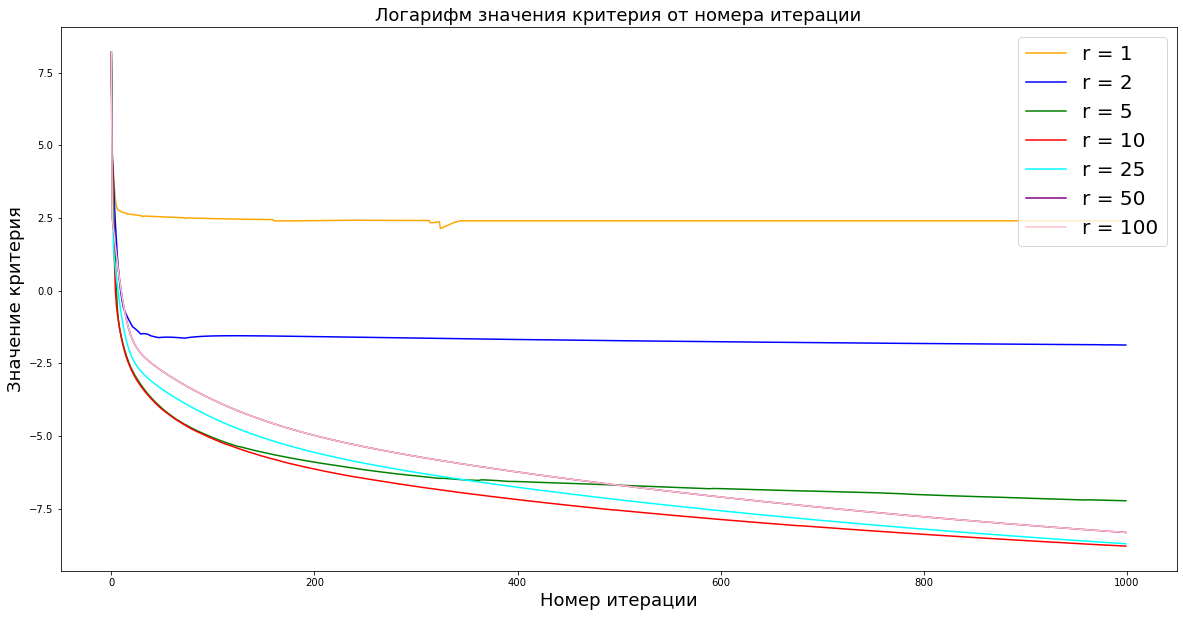

In [649]:
plt.figure(figsize = (20, 10))

rn = [1, 2, 5, 10, 25, 50, 100]
colors = ["orange", "blue", "green", "red", "cyan", "purple", "pink"]
i = 0

for r in rn:
    w, errors = gradient_descent_proj(grad_f, w_0, 1 / L, 10**3, f, 4)
    iterations = np.array(range(len(errors)))
    plt.plot(iterations, np.log(errors), color = colors[i], label = "r = " + str(r))
    i += 1

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Предсказание:
    
$$y_{pred} = X_{test}w_{train}$$

Ответ может содержать только 1 и 2, поэтому надо округлить значения.

In [652]:
for r in rn:
    w, _ = gradient_descent_proj(grad_f, w_0, 1 / L, 10**3, f, 4)
    y_pred = X_test @ w
    y_pred_ans = np.round(y_pred)
    print("r = " + str(r) + "  Accuracy =", accuracy_score(y_test, y_pred_ans))

r = 1  Accuracy = 0.5156923076923077
r = 2  Accuracy = 0.9372307692307692
r = 5  Accuracy = 0.9938461538461538
r = 10  Accuracy = 0.9975384615384615
r = 25  Accuracy = 0.9963076923076923
r = 50  Accuracy = 0.9950769230769231
r = 100  Accuracy = 0.9950769230769231


In [669]:
def accuracy_graf_proj(y_test, X_test, grad_f, x_0, gamma, iteration, f, crit):
    accuracy = []
    for i in range(0, iteration + 1, 25):
        w, _ = gradient_descent_proj(grad_f, x_0, gamma, i, f, crit)
        y_pred_ans = np.round(X_test @ w)
        accuracy.append(accuracy_score(y_test, y_pred_ans))
    return accuracy

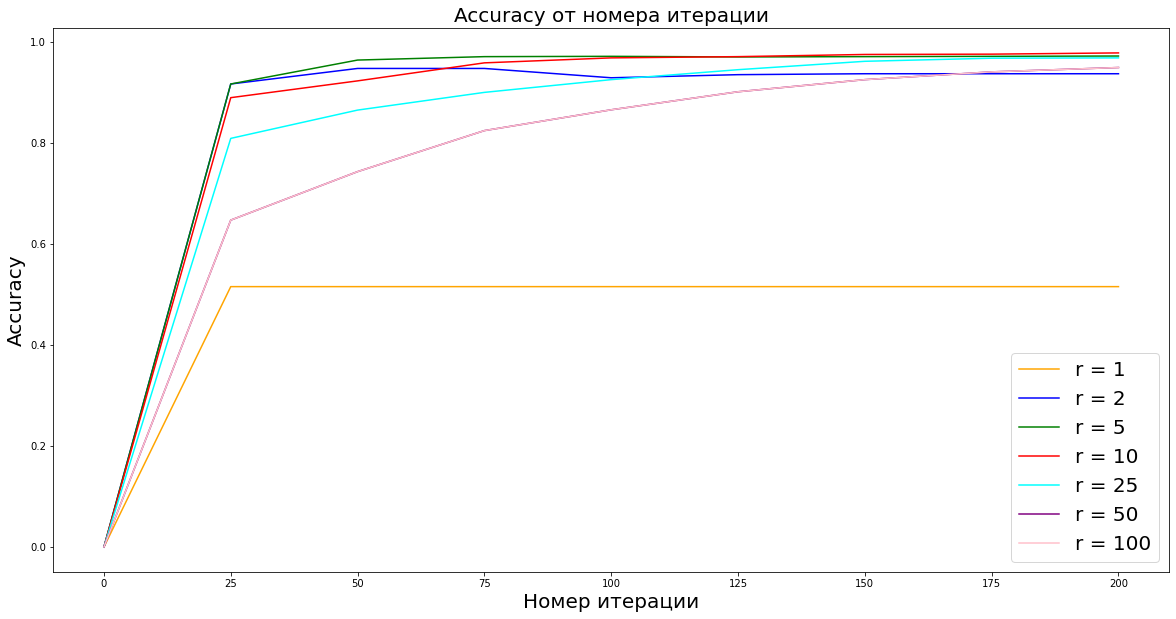

In [672]:
plt.figure(figsize = (20, 10))
i = 0

for r in rn:
    accuracy = accuracy_graf_proj(y_test, X_test, grad_f, w_0, 1 / L, 200, f, 4)
    iterations = 25 * np.array(range(len(accuracy)))
    plt.plot(iterations, accuracy, color = colors[i], label = "r = " + str(r))
    i += 1

plt.title("Accuracy от номера итерации", fontsize = 20)
plt.xlabel("Номер итерации", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)

plt.legend(fontsize = 20)
plt.show()

При $r = 1$ модель обучается плохо, при $r = 2, 5, 10, 25, 50, 100$ accuracy сходится также, как и для случая без проекции, но уже при малых значениях итераций хорошее значение accuracy. 

На мой взгляд оптимально выбрать $r = 25$. Построим для сравнения график accuracy от количества итераций при обычном градиентном спуске и при градиентном спуске методом проекций.

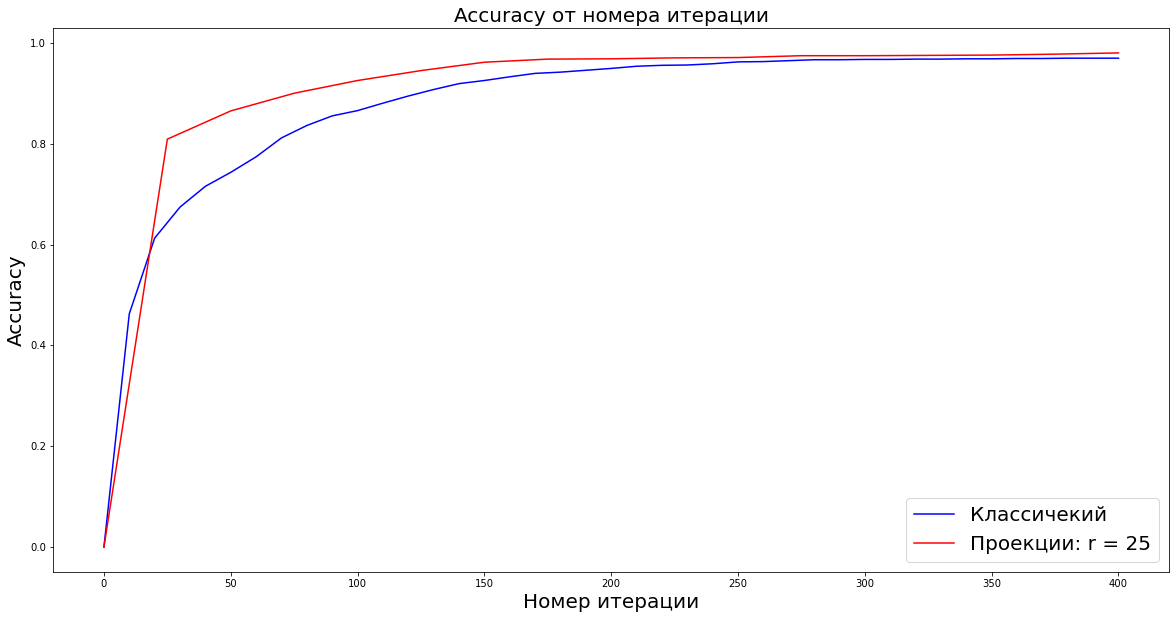

In [671]:
plt.figure(figsize = (20, 10))

accuracy = accuracy_graf(y_test, X_test, grad_f, w_0, 1 / L, 400, f, 4)
iterations = 10 * np.array(range(len(accuracy)))
plt.plot(iterations, accuracy, color = 'blue', label = 'Классичекий')

r = 25    
accuracy = accuracy_graf_proj(y_test, X_test, grad_f, w_0, 1 / L, 400, f, 4)
iterations = 25 * np.array(range(len(accuracy)))
plt.plot(iterations, accuracy, color = "red", label = "Проекции: r = 25")

plt.title("Accuracy от номера итерации", fontsize = 20)
plt.xlabel("Номер итерации", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)

plt.legend(fontsize = 20)
plt.show()

Точночть модели молучилась примерно такая же, но скорость обучения увеличилась.

__Бонусные пункт__

__(ж)__ Снова рассмотрим задачу обучения без ограничений, но добавим к ней регуляризатор 1) $\lambda \| x \|_1$ c $\lambda  > 0$, 2) $\lambda \| x \|_2$ c $\lambda  > 0$. Сможем ли для новой задачи с регуляризатором использовать честный градиентный спуск без модификаций? Почему? Предложите свои идеи, как модифицировать градиентный спуск для новой задачи. Проведите для него эксперименты из пунктов г) и д).  Пробуйте различные $\lambda > 0$ и найдите лучшее (опишите почему именно такое лучшее). Сравните результаты с пунктом e).

In [ ]:
#ответ

__(з)__ Воспользуемся для нашей задачи методом [PCA](https://ru.wikipedia.org/wiki/Метод_главных_компонент). Прочитайте про него подробнее и опишите основную идею.

In [ ]:
#ответ

Следующий код запускает PCA для нашего датасета. Убедитесь, что понимаете происходящие.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)  #эта строчка будет работать только если есть матрица X_train
print (pca.explained_variance_ratio_.cumsum())

[0.17005028 0.30175764 0.3954282  0.45782477 0.49763949 0.53565536
 0.56808839 0.59620613 0.62329393 0.64530114]


Какое значение n_components разумно поставить? Для новой матрицы X_train повторите пункт ж). Измерьте время работы процесса обучения. Постройте график точности решения на тестовой выборке от времени работы для честного X_train и полученного с помощью PCA.